# Notebook 7: Population Decoding and Maximum Likelihood

Computational Biology 2 - WS 23/24

Material created by Katharina Bracher and Florian Eberhardt.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

## Simulation of recording data

To simulate the neurons we will use: 
- A linear variable (e.g. space, tone).
- Poisson spike statistics,
- A population of neurons with
- Gaussian tuningcurves
- maximal response of 100 spikes/sec

Neurons have random preferred orientations between 0-360° 


In [2]:
# Gaussian tuning, Poisson firing
def gaussian(A, x, sigma):
    return A*np.exp(-(x)**2/(2*sigma**2))

def poissonspikes(rate, time):
    spikes = []
    t = 0
    while t < time:
        t -= np.log(np.random.rand())/rate
        spikes.append(t)
    return spikes[:-1]

def get_spike_train(stimulus, preferred_stimulus, tuning_width=1., time=10., tuning_max=100):
    """
    stimulus: current stimulus
    preferred_stimulus: preferred stimulus of neuron
    tuning_width: width of tuning curves 
    tuning_max: max firing rate, amplitude of gaussian tuning curve
    time: total time of spike train
    """
    x = stimulus - preferred_stimulus
    mean_rate = gaussian(tuning_max, x, tuning_width)
    spike_train = poissonspikes(mean_rate, time)
    return np.array(spike_train)
    

In [3]:
x_0, x_max = 0., 10.  # range of encoded variable x
t_spike_train = 0.5 # seconds, duration of a spiketrain
n_neurons = 50
n_stimuli = 36
n_test = 5  # number of test stimuli
preferred_stimulus = np.random.rand(n_neurons)*x_max
tuning_width = np.ones(n_neurons)*2.
stimuli_train = np.arange(n_stimuli)/n_stimuli*x_max
stimuli_test = np.arange(n_test)/n_test*x_max
rate_max = 100. # Hz

In [6]:
recordings_train = pd.DataFrame(index=range(n_neurons), columns=stimuli_train, dtype='object')
for stim in stimuli_train:
    for i, pref in enumerate(preferred_stimulus):
        st = get_spike_train(pref, stim, tuning_width=2., time=t_spike_train,)  
        recordings_train.loc[i,stim]=st.tostring()
        
recordings_test = pd.DataFrame(index=range(n_neurons), columns=stimuli_test, dtype='object')
for stim in stimuli_test:
    for i, pref in enumerate(preferred_stimulus):
        st = get_spike_train(pref, stim, t_spike_train)  
        recordings_test.loc[i,stim]=st.tostring()

In [7]:
def read_spike_times(recordings, neuron, stim_orientation):
    st = recordings.loc[neuron, stim_orientation]
    st = np.frombuffer(st, dtype=float)
    return st

def estimate_rate(recordings, neuron, stim_orientation, t):
    st = read_spike_times(recordings, neuron, stim_orientation)
    r = len(st)/t
    return r

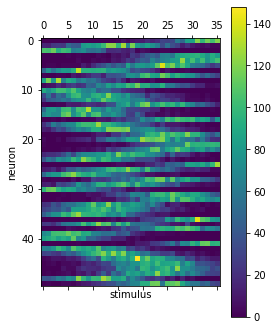

In [9]:

rates_train = np.zeros((n_neurons,n_stimuli))
for ni in range(n_neurons):
    for j,soj in enumerate(stimuli_train):
        rates_train[ni,j] = estimate_rate(recordings_train,ni,soj,t_spike_train)
mat = plt.matshow(rates_train)
plt.ylabel('neuron')
plt.xlabel('stimulus')
cbar = plt.colorbar(mat)

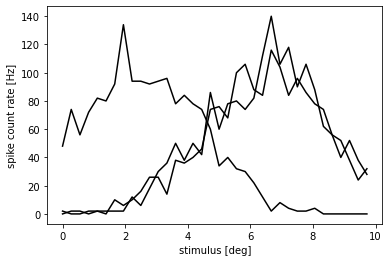

In [10]:
plt.plot(stimuli_train,rates_train[5:8].transpose(),'k-')
plt.xlabel('stimulus [deg]')
plt.ylabel('spike count rate [Hz]')
plt.show()